# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Import Librarires and Load The Data

In [1]:
import pickle
import os
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data
# data_path = '../data'
data_path = 'traffic-signs-data'

training_file = os.path.join(data_path, 'train.p')
validation_file = os.path.join(data_path, 'valid.p')
testing_file = os.path.join(data_path, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

The cell below shows an example for each of the traffic signs with the respective label

In [4]:
df_names = pd.read_csv('signnames.csv')
names = df_names.values

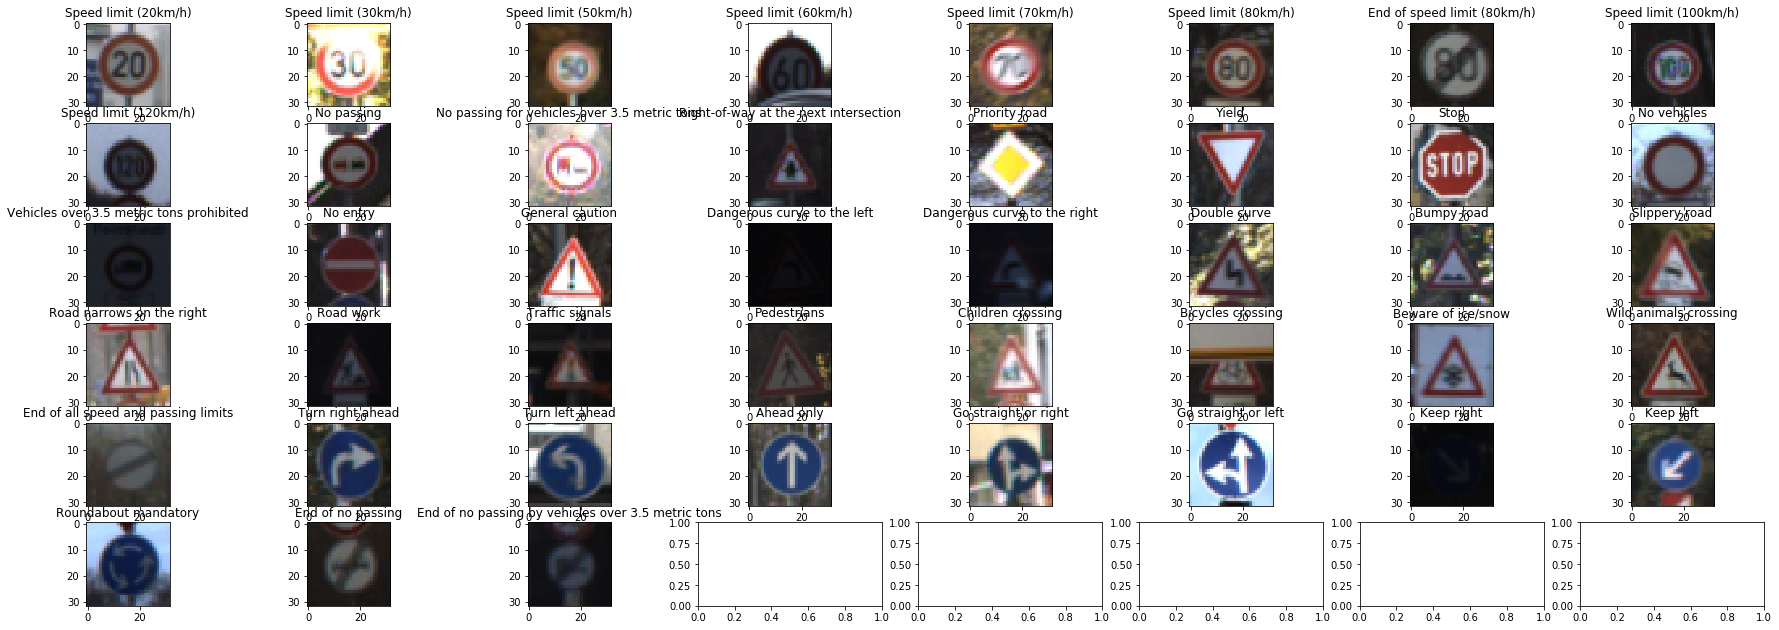

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

sample_per_class_img = {}
for class_i in range(n_classes):
    sample_per_class_img['img_class' + str(class_i)] = X_train[(y_train == class_i).nonzero()[0][0]]

df_names = pd.read_csv('signnames.csv')
names = df_names.values

nrows = 6
ncols = 8
f, axs = plt.subplots(nrows, ncols, figsize=(24, 9))

class_i = 0
for row in range(nrows):
    for col in range(ncols):
        if class_i < n_classes:
            axs[row, col].imshow(sample_per_class_img['img_class'+ str(class_i)])
            axs[row, col].set_title(names[class_i][1])
            class_i += 1

plt.subplots_adjust(left=0., right=1., top=0.9, bottom=0.)
f.savefig('output_images/example_per_class')

Then, the distibution of the data is shown. It shows how many samples there are for each class

In [6]:
unique_classes, frequency_per_class = np.unique(y_train, return_counts=True)

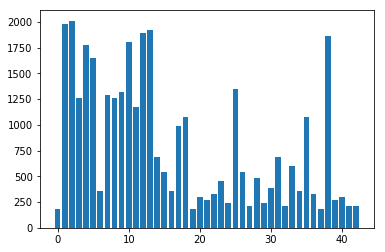

In [7]:
f, ax = plt.subplots()
plt.bar(unique_classes, frequency_per_class)
f.savefig('output_images/frequency_per_class')

The figure above showed that the dataset is imbalanced, that is, there are not the same number of examples per class and it would be helpful to augment data

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Pre-process: Converting to grayscale
Other aspect that improves learning is convert the RGB images to grayscale. A good approach I found on the web was [this](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python#answer-12201744)

In [8]:
print(X_train[... , :3].shape)
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
X_train = gray(X_train)
X_valid = gray(X_valid)
X_test = gray(X_test)

(34799, 32, 32, 3)


The next cell, shows an example of applying this transformations to some images:

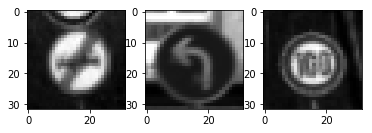

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(X_train[0], cmap='gray')
ax2.imshow(X_train[1], cmap='gray')
ax3.imshow(X_train[2], cmap='gray')
f.savefig('output_images/gray_example')

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print('X_train shape: ', X_train.shape)

X_train shape:  (34799, 32, 32, 1)


#### Pre-process: Data Augmentation
As seen in previous steps, the dataset is imabalanced, and it is a good idea to generate new fake data in order to improve performance. In this step keras library is used to augment data. Specifically, if there are less than 1000 examples per class, new data is generated until the examples per class is at least 1000. The approach to generate data is to create create new images by shifting horizontal and vertically, `width_shift_range` and `height_shift_range`; The `shear_range` controls the angle in counterclockwise direction as radians in which the
image will allowed to be sheared. Finally, the `zoom_range`, a floating point value that allows
the image to be “zoomed in” or “zoomed out” according to the following uniform distribution of
values: `[1 - zoom_range, 1 + zoom_range]`

First, some images of the training set (converted to grayscale) are selected to apply the transformations described:

In [11]:
indices_class_i = (y_train == 1).nonzero()[0][0:9]

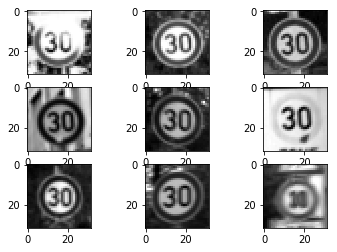

In [12]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(X_train[indices_class_i[i]][..., -1], cmap='gray')
    plt.savefig('output_images/data_augmentation_prev')
# plt.show()

Then an example of applying the transformations to these images is shown below:

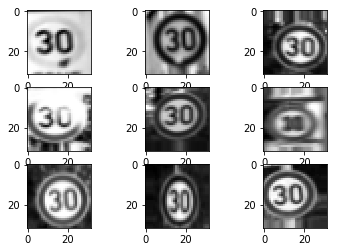

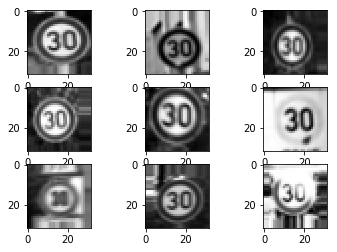

In [13]:
aug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         fill_mode='nearest')

image_gen = aug.flow(X_train[indices_class_i], y_train[indices_class_i], batch_size=9)

new_X = X_train
new_y = y_train

stop = 0
for batchx, batchy in image_gen:
    for i in range(9):
        plt.subplot(330+1+i)
        plt.imshow(batchx[i][..., -1], cmap='gray')
        plt.savefig('output_images/data_augmentation')
    plt.show()
    stop += 1
    new_X = np.concatenate((new_X, batchx))
    new_y = np.concatenate((new_y, batchy))
    if stop == 2:
        break


Now, it is time to generate new fake data for the entire training set with the approach described previously and print the dimension of the augmented training set

In [14]:
X_train_orig = np.copy(X_train)
y_train_orig = np.copy(y_train)

In [15]:
print('Training data dimensions before augmentation: ', X_train.shape)

(y_train == 0).nonzero()[0]

aug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                             fill_mode='nearest')

augmentation_batch = min(frequency_per_class)
for class_i in range(n_classes):
    indices_class_i = (y_train == class_i).nonzero()[0]
    samples_for_class = len(indices_class_i)
    
    if samples_for_class < 1000:        
        image_gen = aug.flow(X_train[indices_class_i], y_train[indices_class_i], batch_size=augmentation_batch)

        for batch_aug_x, batch_aug_y in image_gen:
            if samples_for_class > 1000:
                break
            else:
                X_train = np.concatenate((X_train, batch_aug_x))
                y_train = np.concatenate((y_train, batch_aug_y))
                samples_for_class += len(batch_aug_y)
print('Training set X augmented shape:  ', X_train.shape)
print('Training set y augmented shape', y_train.shape)
    

Training data dimensions before augmentation:  (34799, 32, 32, 1)
Training set X augmented shape:   (54119, 32, 32, 1)
Training set y augmented shape (54119,)


The figure below shows the new distribution of the data, where we can see a better balanced dataset

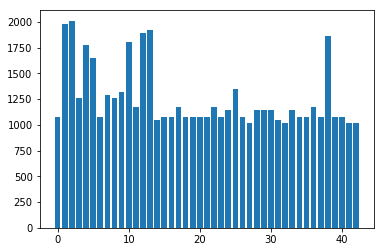

In [16]:
unique_classes, frequency_per_class = np.unique(y_train, return_counts=True)
f, ax = plt.subplots()
plt.bar(unique_classes, frequency_per_class)
f.savefig('output_images/augmented_frequency_per_class')

#### Pre-process: Data Normalization
The next step is to normalize the data, so that it has zero mean and equal variance:

In [17]:
X_train, y_train = shuffle(X_train, y_train)

X_train = (X_train - 128) / 128
X_valid = (X_valid - 128) / 128
X_test = (X_test - 128) / 128

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_valid.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (54119, 32, 32, 1)
X_valid shape:  (4410, 32, 32, 1)
X_test shape:  (12630, 32, 32, 1)


### Model Architecture

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

The LENET architecture is used to train and get the model with some variations to the architecture presented in the course. Specifically, other approach for weight initilization is changed. In this case the `xavier_initializer` is used as it has into account the number of connections for a given layer. The other significative change is the use of Dropout regularizer in the fully connected layers (except the output layer, because it is not suitable to eliminate connections in that layer) with a `keep_prob` value of `0.6`

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def lenet(x, keep_prob):
    mu = 0
    sigma = 0.1
#     From input 32x32x3 to output 28x28x6
    conv1_W = tf.get_variable('conv1_W', [5, 5, 1, 6], initializer=tf.contrib.layers.xavier_initializer())
    conv1_b = tf.get_variable('conv1_b', [6], initializer=tf.zeros_initializer())
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID')
    
    conv1 = tf.nn.relu(conv1)
    
    # From 28x28x6 to 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Conv2 layer. From 14x14x6 to 10x10x16
    conv2_W = tf.get_variable('conv2_W', [5,5,6,16], initializer=tf.contrib.layers.xavier_initializer())
    conv2_b = tf.get_variable('conv2_b', [16], initializer=tf.zeros_initializer())
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID')
    
    conv2 = tf.nn.relu(conv2)
    
    # Maxpool from 10x10x16 to 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten volume
    fc0 = flatten(conv2)
    
    #Fully connected layer from 400 neurons to 120 neurons
    fc1_W = tf.get_variable('fc1_W', [5*5*16, 120], initializer=tf.contrib.layers.xavier_initializer())
    fc1_b = tf.get_variable('fc1_b', [120], initializer=tf.zeros_initializer())
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Fully connected layer from 120 to 84 neurons
    fc2_W = tf.get_variable('fc2_W', [120, 84], initializer=tf.contrib.layers.xavier_initializer())
    fc2_b = tf.get_variable('fc2_b', [84], initializer=tf.zeros_initializer())
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Output layer from 84 to 10 output neurons
    fc3_W = tf.get_variable('fc3_W', [84, 43], initializer=tf.contrib.layers.xavier_initializer())
    fc3_b = tf.get_variable('fc3_b', [43], initializer=tf.zeros_initializer())
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)
    
    return logits, regularizers
    

### Hyperparameters
Here the hyperparameters for training the neural network are defined. Specifically, a `batch_size` of 128 examples are used to compute one step in gradient descent. A `learning_rate` of `0.001` is a good choice for this problem. Training during `100 epochs` is enough for this problem and a `beta` value of `0.01` is used to add l2 regularization (not currently enabled)

In [20]:
# TODO play more with the l2_loss
batch_size = 128
learning_rate = 0.001
epochs = 100
num_examples = len(X_train)
beta = 0.01

Next, the optimization problem is defined

In [21]:
tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
y = tf.placeholder(tf.int32, shape=[None])
y_one_hot = tf.one_hot(y, n_classes)

logits, regularizers = lenet(x, keep_prob)
# cost_term1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot))
# cost = tf.reduce_mean(cost_term1 + beta * regularizers)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

saver = tf.train.Saver()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



## Training the neural network
Now everything is ready to train the neural network using minibatches inside a tensorflow session:

In [13]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    costs = []
    for epoch in range(epochs):
        
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            c, _ = sess.run([cost, optimizer], feed_dict={x: batch_x, y: batch_y, keep_prob:0.6})
            
        costs.append(c)
        print('Cost after iteration {}: {}'.format(epoch, c))
        train_accuracy = sess.run(accuracy, feed_dict={x: X_train, y: y_train, keep_prob:1.})
        val_accuracy = sess.run(accuracy, feed_dict={x: X_valid, y:y_valid, keep_prob:1.})
        print('Training accuracy = {:.3f}'.format(train_accuracy))
        print('Validation accuracy = {:.3f}'.format(val_accuracy))
    
    saver.save(sess, './model/lenet')
    print('Model saved')
        
    

Cost after iteration 0: 1.6732895374298096
Training accuracy = 0.708
Validation accuracy = 0.759
Cost after iteration 1: 1.0364049673080444
Training accuracy = 0.835
Validation accuracy = 0.856
Cost after iteration 2: 0.701659619808197
Training accuracy = 0.887
Validation accuracy = 0.882
Cost after iteration 3: 0.5478600859642029
Training accuracy = 0.911
Validation accuracy = 0.888
Cost after iteration 4: 0.6871024370193481
Training accuracy = 0.926
Validation accuracy = 0.909
Cost after iteration 5: 0.500323474407196
Training accuracy = 0.943
Validation accuracy = 0.917
Cost after iteration 6: 0.39727187156677246
Training accuracy = 0.950
Validation accuracy = 0.922
Cost after iteration 7: 0.2815765142440796
Training accuracy = 0.958
Validation accuracy = 0.931
Cost after iteration 8: 0.43133652210235596
Training accuracy = 0.964
Validation accuracy = 0.928
Cost after iteration 9: 0.24853582680225372
Training accuracy = 0.968
Validation accuracy = 0.931
Cost after iteration 10: 0.23

Here, the cost behavior during traning is plotted

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


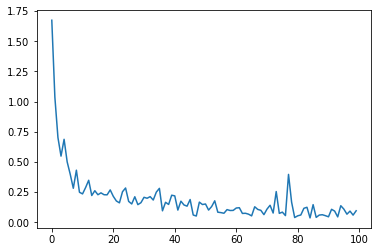

In [14]:
# plot cost over time
f, ax = plt.subplots()
plt.plot(costs)
f.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [22]:
saved_model = './model/lenet'
with tf.Session() as sess:
    saver.restore(sess, saved_model)
    val_accuracy = sess.run(accuracy, feed_dict={
        x: X_valid,
        y: y_valid,
        keep_prob: 1.
    })
print('Validation accuracy: {:.3f}'.format(val_accuracy))

INFO:tensorflow:Restoring parameters from ./model/lenet
Validation accuracy: 0.961


### Load and Output the Images

In [23]:
import matplotlib.image as mpimg
import cv2

5 images of german traffic signs were downloaded from the web in order to make predictions with the trained model. Here are the images:

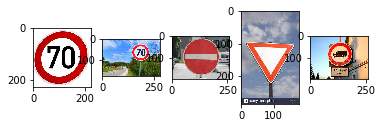

In [24]:
image1 = mpimg.imread('test_images/test1.jpeg')
image2 = mpimg.imread('test_images/test2.jpeg')
image3 = mpimg.imread('test_images/test3.jpeg')
image4 = mpimg.imread('test_images/test4.jpeg')
image5 = mpimg.imread('test_images/test5.jpeg')
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)
ax4.imshow(image4)
ax5.imshow(image5)

### Predict the Sign Type for Each Image
Next, a function is defined to make predictions on those images. Inside this function, the pre-processing steps are called and then the model is run with the image in order to get the prediction

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def make_prediction(img):
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

    img = gray(img)    
    plt.imshow(img, cmap='gray')
    img = img.reshape(1, img.shape[0], img.shape[1], 1)
    img = (img - 128) / 128
    saved_model = './model/lenet'

    pred = tf.argmax(tf.nn.softmax(logits), 1)

    with tf.Session() as sess:
        saver.restore(sess, saved_model)
        estimation = sess.run(pred, feed_dict={
            x: img,
            keep_prob: 1.
        })
    print('Class estimated by model: {}'.format(names[estimation[0]][1]))

Now, for each of the images, the function is called and the prediction result showed

INFO:tensorflow:Restoring parameters from ./model/lenet
Class estimated by model: Speed limit (70km/h)


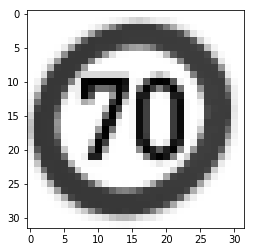

In [26]:
make_prediction(image1)

INFO:tensorflow:Restoring parameters from ./model/lenet
Class estimated by model: Dangerous curve to the left


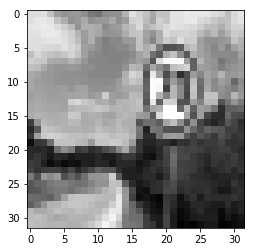

In [27]:
make_prediction(image2)

INFO:tensorflow:Restoring parameters from ./model/lenet
Class estimated by model: No entry


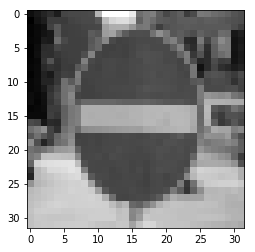

In [28]:
make_prediction(image3)

INFO:tensorflow:Restoring parameters from ./model/lenet
Class estimated by model: Yield


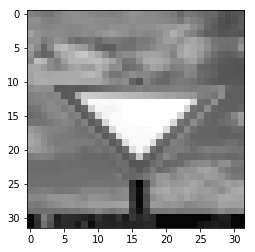

In [29]:
make_prediction(image4)

INFO:tensorflow:Restoring parameters from ./model/lenet
Class estimated by model: Vehicles over 3.5 metric tons prohibited


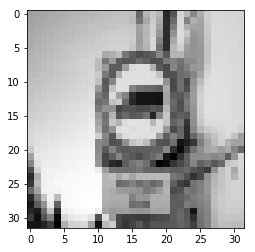

In [30]:
make_prediction(image5)

### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
def preprocess_new_image(img):
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

    img = gray(img)
    img = img.reshape(1, img.shape[0], img.shape[1], 1)
    img = (img - 128) / 128
    return img

img1 = preprocess_new_image(image1)
img2 = preprocess_new_image(image2)
img3 = preprocess_new_image(image3)
img4 = preprocess_new_image(image4)
img5 = preprocess_new_image(image5)
new_images = np.concatenate((img1, img2, img3, img4, img5))
print(new_images.shape)
print(y_valid)
y_new_images = [4, 4, 17, 13, 16]

saved_model = './model/lenet'
with tf.Session() as sess:
    saver.restore(sess, saved_model)
    new_images_accuracy = sess.run(accuracy, feed_dict={
        x: new_images,
        y: y_new_images,
        keep_prob: 1.
    })
print('Accuracy on new images: {:.3f}'.format(new_images_accuracy))

(5, 32, 32, 1)
[41 41 41 ... 25 25 25]
INFO:tensorflow:Restoring parameters from ./model/lenet
Accuracy on new images: 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
saved_model = './model/lenet'

Next, the function `calculate_top5_probs` is defined to calculate and return the top 5 probabilities with the indices that represent the classes:

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def calculate_top5_probs(x_imgs, y_imgs):
    probs = tf.nn.softmax(logits)
    top_k_probs = tf.nn.top_k(probs, k=5)
    with tf.Session() as sess:
        saver.restore(sess, saved_model)
        top_5_probs = sess.run(top_k_probs, feed_dict={x: x_imgs, y: y_imgs, keep_prob: 1.})
        return top_5_probs

Now, with the images downloaded from the web it is time to call the previous function to get the probabilities for the 5 images along with their respetive classes:

In [34]:
top5_probs = calculate_top5_probs(new_images, y_new_images)
print(top5_probs)

INFO:tensorflow:Restoring parameters from ./model/lenet
TopKV2(values=array([[1.0000000e+00, 4.9569060e-20, 2.2015546e-26, 1.3935065e-34,
        6.8899646e-36],
       [9.8192155e-01, 1.7920591e-02, 1.2478702e-04, 1.3720754e-05,
        1.2358522e-05],
       [1.0000000e+00, 2.7418202e-21, 9.8043460e-22, 2.0370337e-22,
        6.0528269e-23],
       [1.0000000e+00, 3.6486094e-22, 2.5744921e-22, 8.8634232e-25,
        7.7069058e-25],
       [9.9995208e-01, 4.2835971e-05, 2.7159281e-06, 2.3204302e-06,
        5.3795528e-08]], dtype=float32), indices=array([[ 4,  1,  0, 19,  8],
       [19, 21, 37, 26, 27],
       [17, 34, 42, 33, 41],
       [13, 15, 14, 32,  1],
       [16, 42, 11, 34, 33]], dtype=int32))


Here, for example for the first image the classes with higher probabilities were `4, 1, 0, 19, 8` and the probabilities were `[1.0000000e+00, 4.9569060e-20, 2.2015546e-26, 1.3935065e-34, 6.8899646e-36]` respectively. As can be seen from the results, the model is pretty confident with the results presented as the probability values are close to one

### Accuracy on test set

Finally the accuracy on the test set is calculated:

In [36]:
saved_model = './model/lenet'
with tf.Session() as sess:
    saver.restore(sess, saved_model)
    test_accuracy = sess.run(accuracy, feed_dict={
        x: X_test,
        y: y_test,
        keep_prob: 1.
    })
print('Accuracy on test set: {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model/lenet
Accuracy on test set: 0.944


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")